In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


• looks like our dataset has no NaNs! 
• Overview, Original_Language and Poster-Url wouldn't be so useful during analysis 
• Release_Date column needs to be casted into date time and to extract only the year value

In [4]:
df.shape

(9827, 9)

In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

• genres are saperated by commas followed by whitespaces.

In [6]:
df.duplicated().sum()

np.int64(0)

• our dataset has no duplicated rows either.


In [7]:
# exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
# Data Cleaning

 Casting Release_Date column and extracing year values

In [9]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [10]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])  #  to convert various input types into pandas datetime objects, specifically Timestamp objects or DatetimeIndex objects

# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [11]:
df['Release_Date']

0      2021-12-15
1      2022-03-01
2      2022-02-25
3      2021-11-24
4      2021-12-22
          ...    
9822   1973-10-15
9823   2020-10-01
9824   2016-05-06
9825   2021-03-31
9826   1984-09-23
Name: Release_Date, Length: 9827, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [13]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


 **Dropping Overview, Original_Languege and Poster-Url**

In [14]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [15]:
# dropping columns and confirming changes
df.drop(cols,axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**categorizing Vote_Average colum**

 We would cut the Vote_Average values and make 4 categories: popular average
 below_avg not_popular to describe it more using catigorize_col() function
 provided above.

In [17]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827,9827.000000,9827.000000,9827.000000
mean,2006-09-23 11:05:51.317798144,40.326088,1392.805536,6.439534
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-18 00:00:00,16.128500,146.000000,5.900000
50%,2011-09-13 00:00:00,21.199000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.191500,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.873998,2611.206907,1.129759


In [18]:
df['Vote_Average'].describe()

count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64

In [19]:
df['Vote_Average'].describe()['min']

np.float64(0.0)

In [20]:
 def categorize_col(df, col, labels):
    """
    categorizes a certain column based on its quartiles
   
    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name 
        (labels) list - list of labels from min to max
    
    Returns:
        (df)     df   - dataframe with the categorized col
    """
    
    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
     
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [21]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']

# categorize column based on labels and edges
categorize_col(df, 'Vote_Average', labels)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973-10-15,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020-10-01,Violent Delights,13.356,8,not_popular,Horror
9824,2016-05-06,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [22]:
# confirming changes
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [23]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [24]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [25]:
# dropping NaN
df.dropna(inplace = True)

# confirming
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


**we'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie**

In [34]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')

In [29]:
df['Genre']

0       [Action, Adventure, Science Fiction]
1                 [Crime, Mystery, Thriller]
2                                 [Thriller]
3       [Animation, Comedy, Family, Fantasy]
4         [Action, Adventure, Thriller, War]
                        ...                 
9822                          [Drama, Crime]
9823                                [Horror]
9824             [Mystery, Thriller, Horror]
9825                 [Music, Drama, History]
9826           [War, Drama, Science Fiction]
Name: Genre, Length: 9727, dtype: object

In [31]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"[Action, Adventure, Science Fiction]"
1,2022-03-01,The Batman,3827.658,1151,popular,"[Crime, Mystery, Thriller]"
2,2022-02-25,No Exit,2618.087,122,below_avg,[Thriller]
3,2021-11-24,Encanto,2402.201,5076,popular,"[Animation, Comedy, Family, Fantasy]"
4,2021-12-22,The King's Man,1895.511,1793,average,"[Action, Adventure, Thriller, War]"


In [35]:
# explode the lists
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


In [36]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25552 non-null  datetime64[ns]
 1   Title         25552 non-null  object        
 2   Popularity    25552 non-null  float64       
 3   Vote_Count    25552 non-null  int64         
 4   Vote_Average  25552 non-null  category      
 5   Genre         25552 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 849.4+ KB


In [38]:
df.nunique()

Release_Date    5846
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551
 rows to dig into during our analysis

**Data Visualization**

 here, we'd use Matplotlib and seaborn for making some informative visuals to gain
 insights abut our data.

In [40]:
# setting up seaborn configurations
sns.set_style('whitegrid')

**Q1: What is the most frequent genre in
 the dataset?**

In [42]:
# showing stats. on genre column
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

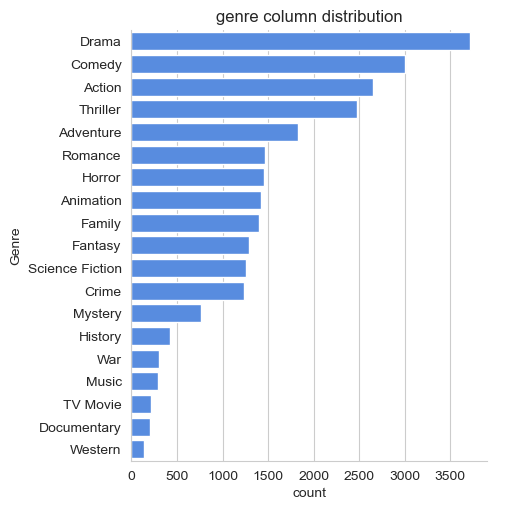

In [43]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count', 
order = df['Genre'].value_counts().index,
color = '#4287f5')
plt.title('genre column distribution')
plt.show()

 we can notice from the above visual that 
Drama genre is the most frequent genre
 in our dataset and has appeared more than 14% of the times among 19 other
 genres.

**Q2: What 
In [71]:
 genres has highest 
votes ?**

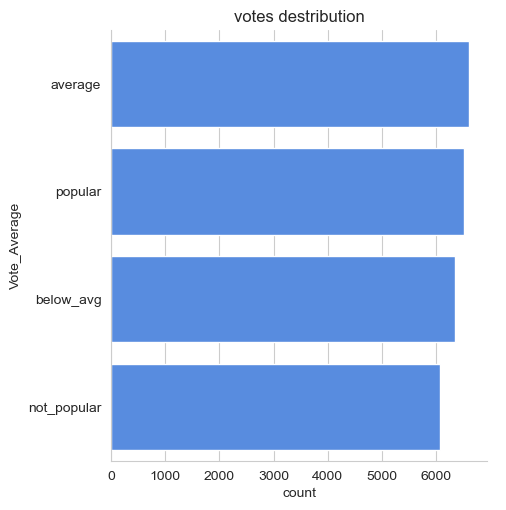

In [44]:
# visualizing vote_average column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', 
order = df['Vote_Average'].value_counts().index,
color = '#4287f5')
plt.title('votes destribution')
plt.show()

**Q3: What movie got the highest 
genre ?**

In [46]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


**Q4: What movie got the lowest popularity? what's
 its genre?**

In [48]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984-09-23,Threads,13.354,186,popular,War
25550,1984-09-23,Threads,13.354,186,popular,Drama
25551,1984-09-23,Threads,13.354,186,popular,Science Fiction


**Q5: Which year has the most filmmed movies?**

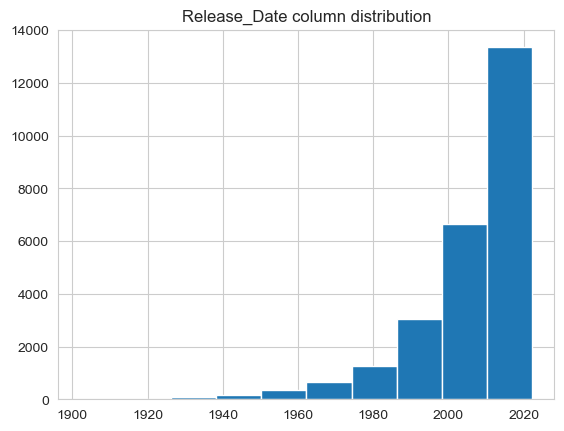

In [49]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

**Conclusion**

**Q1: What is the most frequent 
genre in the dataset?**

Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.


**Q2: What 
genres has highest 
votes ?**

we have 25.5% of our dataset with popular vote (6520 rows). 
Drama again gets the
 highest popularity among fans by being having more than 18.5% of movies popularities.


**Q3: What movie got the highest 
popularity ? what's its 
Action , 
genre ?**

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
 genres of 
Adventure and 
Sience Fiction .


 **Q4: What movie got the lowest 
popularity ? what's its 
genre ?**

The united states, thread' has the highest lowest rate in our dataset 